# Install Module

In [1]:
!pip install tensorflow-decision-forests
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Aquisition

In [2]:
import math, os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

from sklearn import preprocessing
from tensorflow.keras import layers
from tensorflow import feature_column
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
!gdown 1sExNkoKtz6mV_jKsdqYD7w_7gaaPIGcq
!gdown 1207dlMWYiacSwEf_OgqoigCPqFRSTQYf

Downloading...
From: https://drive.google.com/uc?id=1sExNkoKtz6mV_jKsdqYD7w_7gaaPIGcq
To: /content/TrainingID.csv
100% 1.39M/1.39M [00:00<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1207dlMWYiacSwEf_OgqoigCPqFRSTQYf
To: /content/TestingID.csv
100% 14.1k/14.1k [00:00<00:00, 35.3MB/s]


In [4]:
dfTrain = pd.read_csv("./TrainingID.csv")
dfTest = pd.read_csv("./TestingID.csv")

In [5]:
dfTrain.head()

,gatal,ruam kulit,erupsi kulit nodal,bersin terus menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,berteriak-teriak,pengelupasan kulit,perak seperti debu,penyok kecil di kuku,kuku inflamasi,lepuh,sakit merah di sekitar hidung,kerak kuning keluar,prognosa,Tanpa nama: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Infeksi jamur,NaN


In [6]:
dfTest.head()

,gatal,ruam kulit,erupsi kulit nodal,bersin terus menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,komedo,berteriak-teriak,pengelupasan kulit,perak seperti debu,penyok kecil di kuku,kuku inflamasi,lepuh,sakit merah di sekitar hidung,kerak kuning keluar,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alergi
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kolestasis kronis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Reaksi Obat


# Pre-Processing Data

## Fix Cell Format

In [7]:
def show_columns(df):
  data = []
  for i in df.columns:
    data.append(i)
  print(data)

In [8]:
print(f"Before Fixxing : ")
show_columns(dfTrain)
show_columns(dfTest)

# Menghapus spasi diawal dan diakhir nama
dfTrain.columns = dfTrain.columns.str.replace('^ +| +$', '', regex=True)
dfTest.columns = dfTest.columns.str.replace('^ +| +$', '', regex=True)

# Mengubah spasi di tengah nama menjadi _
dfTrain.columns = dfTrain.columns.str.replace(' ', '_', regex=True)
dfTest.columns = dfTest.columns.str.replace(' ', '_', regex=True)

# Mengubah - pada kolom menjadi _
dfTrain.columns = dfTrain.columns.str.replace('-', '_')
dfTest.columns = dfTest.columns.str.replace('-', '_')

# Mengubah . pada kolom menjadi _
dfTrain.columns = dfTrain.columns.str.replace('.', '_', regex=True)
dfTest.columns = dfTest.columns.str.replace('.', '_', regex=True)

print(f"After Fixxing : ")
show_columns(dfTrain)
show_columns(dfTest)

Before Fixxing : 
['gatal', ' ruam kulit', ' erupsi kulit nodal', ' bersin terus menerus', ' gemetaran', ' panas dingin', ' nyeri sendi', ' sakit perut', ' keasaman', ' bisul di lidah', ' pemborosan otot', ' muntah', ' buang air kecil yang terbakar', ' buang air kecil bercak', ' kelelahan', ' penambahan berat badan', ' kecemasan', ' tangan dan kaki dingin', ' perubahan suasana hati', ' penurunan berat badan', ' kegelisahan', ' kelesuan', ' bercak di tenggorokan', ' kadar gula tidak teratur', ' batuk', ' demam tinggi', ' mata cekung', ' sesak napas', ' berkeringat', ' dehidrasi', ' gangguan pencernaan', ' sakit kepala', ' kulit kekuningan', ' urin gelap', ' mual', ' kehilangan selera makan', ' nyeri di belakang mata', ' sakit punggung', ' sembelit', ' sakit perut.1', ' diare', ' demam ringan', ' urin kuning', ' menguningnya mata', ' gagal hati akut', ' kelebihan cairan', ' pembengkakan perut', ' kelenjar getah bening membengkak', ' rasa tidak enak', ' penglihatan kabur dan terdistorsi',

In [9]:
# Menghapus spasi diawal dan diakhir fitur "prognosa"
dfTrain.prognosa = dfTrain.prognosa.str.replace('^ +| +$', '', regex=True)
dfTest.prognosa = dfTest.prognosa.str.replace('^ +| +$', '', regex=True)


## Drop Unecessary Column

In [10]:
dfTrain = dfTrain.drop(['Tanpa_nama:_133'], axis=1)
dfTrain.head()

,gatal,ruam_kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas_dingin,nyeri_sendi,sakit_perut,keasaman,bisul_di_lidah,...,komedo,berteriak_teriak,pengelupasan_kulit,perak_seperti_debu,penyok_kecil_di_kuku,kuku_inflamasi,lepuh,sakit_merah_di_sekitar_hidung,kerak_kuning_keluar,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur


In [11]:
for nama_kolom in dfTrain.columns:
  print(dfTrain[nama_kolom].value_counts(), "\n")

0    4242
1     678
Name: gatal, dtype: int64 

0    4134
1     786
Name: ruam_kulit, dtype: int64 

0    4812
1     108
Name: erupsi_kulit_nodal, dtype: int64 

0    4698
1     222
Name: bersin_terus_menerus, dtype: int64 

0    4812
1     108
Name: gemetaran, dtype: int64 

0    4122
1     798
Name: panas_dingin, dtype: int64 

0    4236
1     684
Name: nyeri_sendi, dtype: int64 

0    4698
1     222
Name: sakit_perut, dtype: int64 

0    4698
1     222
Name: keasaman, dtype: int64 

0    4812
1     108
Name: bisul_di_lidah, dtype: int64 

0    4812
1     108
Name: pemborosan_otot, dtype: int64 

0    3006
1    1914
Name: muntah, dtype: int64 

0    4704
1     216
Name: buang_air_kecil_yang_terbakar, dtype: int64 

0    4812
1     108
Name: buang_air_kecil_bercak, dtype: int64 

0    2988
1    1932
Name: kelelahan, dtype: int64 

0    4806
1     114
Name: penambahan_berat_badan, dtype: int64 

0    4806
1     114
Name: kecemasan, dtype: int64 

0    4806
1     114
Name: tangan_dan_ka

In [12]:
for nama_kolom in dfTest.columns:
  print(dfTest[nama_kolom].value_counts(), "\n")

0    35
1     7
Name: gatal, dtype: int64 

0    34
1     8
Name: ruam_kulit, dtype: int64 

0    41
1     1
Name: erupsi_kulit_nodal, dtype: int64 

0    40
1     2
Name: bersin_terus_menerus, dtype: int64 

0    41
1     1
Name: gemetaran, dtype: int64 

0    35
1     7
Name: panas_dingin, dtype: int64 

0    36
1     6
Name: nyeri_sendi, dtype: int64 

0    40
1     2
Name: sakit_perut, dtype: int64 

0    40
1     2
Name: keasaman, dtype: int64 

0    41
1     1
Name: bisul_di_lidah, dtype: int64 

0    41
1     1
Name: pemborosan_otot, dtype: int64 

0    25
1    17
Name: muntah, dtype: int64 

0    40
1     2
Name: buang_air_kecil_yang_terbakar, dtype: int64 

0    41
1     1
Name: buang_air_kecil_bercak, dtype: int64 

0    25
1    17
Name: kelelahan, dtype: int64 

0    41
1     1
Name: penambahan_berat_badan, dtype: int64 

0    41
1     1
Name: kecemasan, dtype: int64 

0    41
1     1
Name: tangan_dan_kaki_dingin, dtype: int64 

0    40
1     2
Name: perubahan_suasana_hati, 

## Exploratory Data Analysis (EDA)

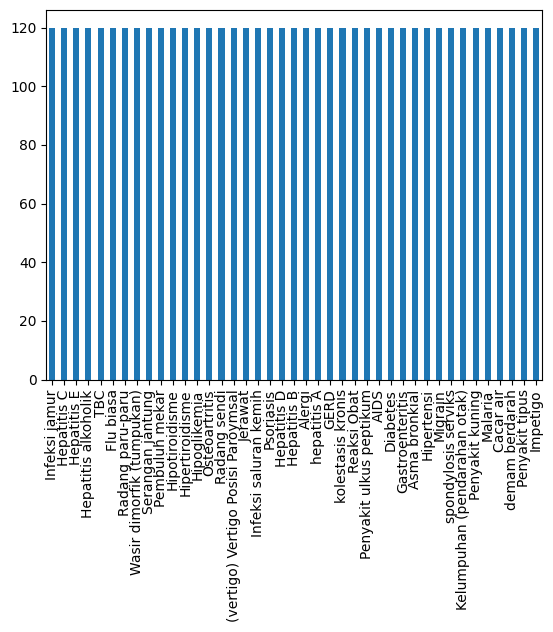

In [13]:
p = dfTrain['prognosa'].value_counts().plot(kind="bar") 

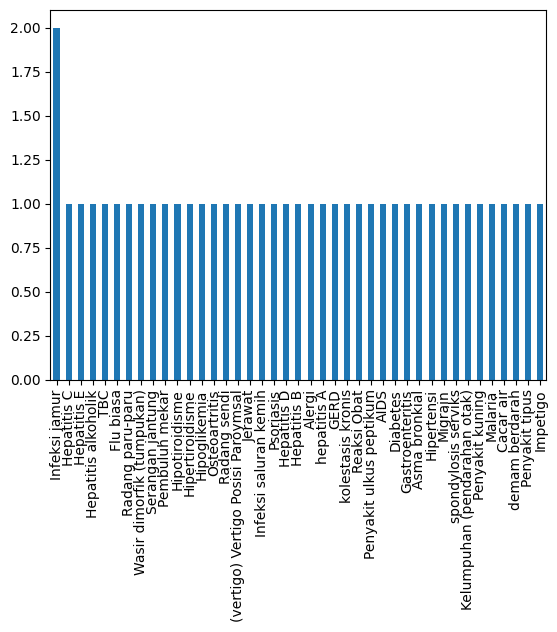

In [14]:
p = dfTest['prognosa'].value_counts().plot(kind="bar") 

In [15]:
dfTrain.isna().sum()

gatal                            0
ruam_kulit                       0
erupsi_kulit_nodal               0
bersin_terus_menerus             0
gemetaran                        0
                                ..
kuku_inflamasi                   0
lepuh                            0
sakit_merah_di_sekitar_hidung    0
kerak_kuning_keluar              0
prognosa                         0
Length: 133, dtype: int64

In [16]:
dfTest.isna().sum()

gatal                            0
ruam_kulit                       0
erupsi_kulit_nodal               0
bersin_terus_menerus             0
gemetaran                        0
                                ..
kuku_inflamasi                   0
lepuh                            0
sakit_merah_di_sekitar_hidung    0
kerak_kuning_keluar              0
prognosa                         0
Length: 133, dtype: int64

## Label Encoding

In [17]:
classes = dfTrain["prognosa"].unique().tolist()
print(f"Label classes: {classes}")

dfTrain["prognosa"] = dfTrain["prognosa"].map(classes.index)

Label classes: ['Infeksi jamur', 'Alergi', 'GERD', 'kolestasis kronis', 'Reaksi Obat', 'Penyakit ulkus peptikum', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Asma bronkial', 'Hipertensi', 'Migrain', 'spondylosis serviks', 'Kelumpuhan (pendarahan otak)', 'Penyakit kuning', 'Malaria', 'Cacar air', 'demam berdarah', 'Penyakit tipus', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hepatitis alkoholik', 'TBC', 'Flu biasa', 'Radang paru-paru', 'Wasir dimorfik (tumpukan)', 'Serangan jantung', 'Pembuluh mekar', 'Hipotiroidisme', 'Hipertiroidisme', 'Hipoglikemia', 'Osteoartritis', 'Radang sendi', '(vertigo) Vertigo Posisi Paroymsal', 'Jerawat', 'Infeksi saluran kemih', 'Psoriasis', 'Impetigo']


In [18]:
classes = dfTrain["prognosa"].unique().tolist()
print(f"Label classes: {classes}")

Label classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [19]:
classes = dfTest["prognosa"].unique().tolist()
print(f"Label classes: {classes}")

dfTest["prognosa"] = dfTest["prognosa"].map(classes.index)

Label classes: ['Infeksi jamur', 'Alergi', 'GERD', 'kolestasis kronis', 'Reaksi Obat', 'Penyakit ulkus peptikum', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Asma bronkial', 'Hipertensi', 'Migrain', 'spondylosis serviks', 'Kelumpuhan (pendarahan otak)', 'Penyakit kuning', 'Malaria', 'Cacar air', 'demam berdarah', 'Penyakit tipus', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hepatitis alkoholik', 'TBC', 'Flu biasa', 'Radang paru-paru', 'Wasir dimorfik (tumpukan)', 'Serangan jantung', 'Pembuluh mekar', 'Hipotiroidisme', 'Hipertiroidisme', 'Hipoglikemia', 'Osteoartritis', 'Radang sendi', '(vertigo) Vertigo Posisi Paroymsal', 'Jerawat', 'Infeksi saluran kemih', 'Psoriasis', 'Impetigo']


In [20]:
classes = dfTest["prognosa"].unique().tolist()
print(f"Label classes: {classes}")

Label classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


## Save Data Clean

In [21]:
dfTrain.to_csv('data_train_clean.csv', index = False, header = True,index_label=None)
dfTest.to_csv('data_test_clean.csv', index = False, header = True,index_label=None)

# Load dataframe into dataset

In [22]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dfTrain, label="prognosa", fix_feature_names=True)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dfTest, label="prognosa", fix_feature_names=True)

# Fitting Model & Training

In [23]:
model = tfdf.keras.RandomForestModel(verbose=2)

model.fit(train_ds,
          num_trees=500)

Use 2 thread(s) for training
Use /tmp/tmpi798y9nj as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'gatal': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'ruam_kulit': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'erupsi_kulit_nodal': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'bersin_terus_menerus': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'gemetaran': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'panas_dingin': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'nyeri_sendi': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'sakit_perut': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'keasaman': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'bisul_di_lidah': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'pemborosan_otot': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'muntah': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'buang_air_kecil_yang_terbakar': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'buang_air_kecil_bercak': <tf.Tensor 'data_13:0' shape=(None,) d

[INFO 23-05-19 20:14:21.0097 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-19 20:14:21.0097 UTC kernel.cc:774] Collect training examples
[INFO 23-05-19 20:14:21.0098 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-19 20:14:21.0109 UTC kernel.cc:393] Number of batches: 5
[INFO 23-05-19 20:14:21.0109 UTC kernel.cc:394] Number of examples: 4920
[INFO 23-05-19 20:14:21.0563 UTC kernel.cc:794] Training dataset:
Number of records: 4920
Number of columns: 133

Number of columns by type:
	NUMERICAL: 132 (99.2481%)
	CATEGORICAL: 1 (0.75188%)

Columns:

NUMERICAL: 132 (99.2481%)
	1: "batuk" NUMERICAL mean:0.114634 min:0 max:1 sd:0.

Model trained in 0:00:10.752699
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


# Evaluate Model

In [24]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 564ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


In [25]:
model.make_inspector().evaluation()

Evaluation(num_examples=4920, accuracy=0.9985772357723577, loss=0.07372572160537953, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [26]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=16)

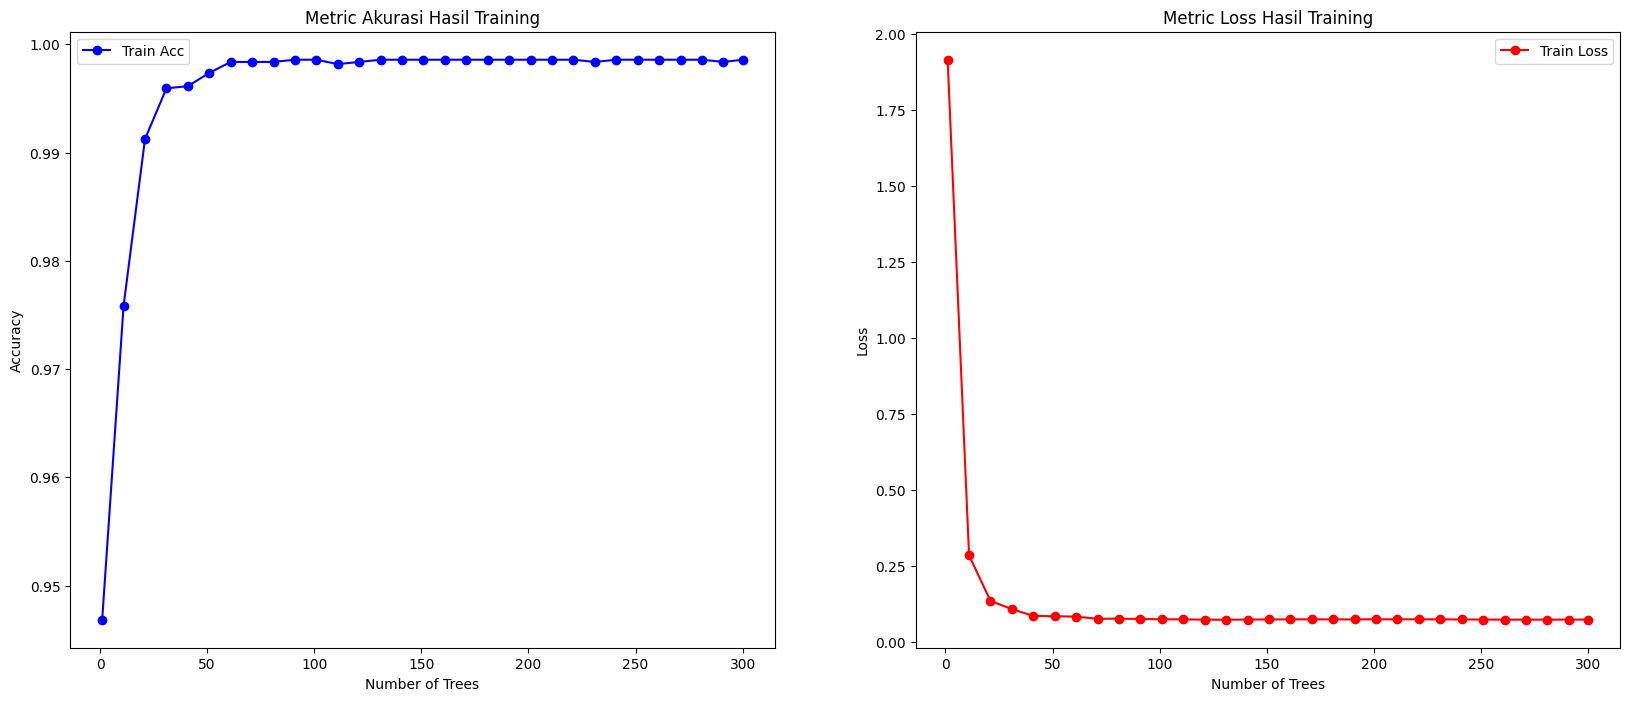

In [27]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

catatan = model.make_inspector().training_logs()

ax[0].plot([log.num_trees for log in catatan], [log.evaluation.accuracy for log in catatan], color = 'blue', marker = 'o', linestyle = '-', label='Train Acc')
ax[0].set_title('Metric Akurasi Hasil Training')
ax[0].legend()
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('Accuracy')

ax[1].plot([log.num_trees for log in catatan], [log.evaluation.loss for log in catatan], color = 'red', marker = 'o', linestyle = '-', label= 'Train Loss')
ax[1].set_title('Metric Loss Hasil Training')
ax[1].legend()
ax[1].set_xlabel('Number of Trees')
ax[1].set_ylabel('Loss')

plt.show()


# Predict Custom User Input

In [28]:
print(f"Banyak fitur inputan : {len(dfTrain.columns)-1} fitur")

Banyak fitur inputan : 132 fitur


In [31]:
df_custom = pd.DataFrame(data={
    'gatal': [1],
    'ruam_kulit': [1],
    'erupsi_kulit_nodal': [1],
    'bersin_terus_menerus': [0],
    'gemetaran': [0],
    'panas_dingin': [0],
    'nyeri_sendi': [0],
    'sakit_perut': [0],
    'keasaman': [0],
    'bisul_di_lidah': [0],
    'pemborosan_otot': [0],
    'muntah': [0],
    'buang_air_kecil_yang_terbakar': [0],
    'buang_air_kecil_bercak': [0],
    'kelelahan': [0],
    'penambahan_berat_badan': [0],
    'kecemasan': [0],
    'tangan_dan_kaki_dingin': [0],
    'perubahan_suasana_hati': [0],
    'penurunan_berat_badan': [0],
    'kegelisahan': [0],
    'kelesuan': [0],
    'bercak_di_tenggorokan': [0],
    'kadar_gula_tidak_teratur': [0],
    'batuk': [0],
    'demam_tinggi': [0],
    'mata_cekung': [0],
    'sesak_napas': [0],
    'berkeringat': [0],
    'dehidrasi': [0],
    'gangguan_pencernaan': [0],
    'sakit_kepala': [0],
    'kulit_kekuningan': [0],
    'urin_gelap': [0],
    'mual': [0],
    'kehilangan_selera_makan': [0],
    'nyeri_di_belakang_mata': [0],
    'sakit_punggung': [0],
    'sembelit': [0],
    'sakit_perut_1': [0],
    'diare': [0],
    'demam_ringan': [0],
    'urin_kuning': [0], 
    'menguningnya_mata': [0],
    'gagal_hati_akut': [0],
    'kelebihan_cairan': [0],
    'pembengkakan_perut': [0],
    'kelenjar_getah_bening_membengkak': [0],
    'rasa_tidak_enak': [0],
    'penglihatan_kabur_dan_terdistorsi': [0],
    'dahak': [0],
    'iritasi_tenggorokan': [0],
    'mata_merah': [0],
    'tekanan_sinus': [0],
    'pilek': [0],
    'penyumbatan': [0],
    'nyeri_dada': [0],
    'kelemahan_pada_tungkai': [0],
    'detak_jantung_cepat': [0],
    'nyeri_saat_buang_air_besar': [0],
    'nyeri_di_daerah_anus': [0],
    'tinja_berdarah': [0],
    'iritasi_pada_anus': [0],
    'sakit_leher': [0],
    'pusing': [0],
    'kram': [0],
    'memar': [0],
    'kegemukan': [0],
    'kaki_bengkak': [0],
    'pembuluh_darah_membengkak': [0],
    'wajah_dan_mata_sembab': [0],
    'tiroid_yang_membesar': [0],
    'kuku_rapuh': [0],
    'ekstremitas_bengkak': [0],
    'rasa_lapar_yang_berlebihan': [0],
    'kontak_perkawinan_ekstra': [0],
    'bibir_kering_dan_kesemutan': [0],
    'ucapan_cadel': [0],
    'sakit_lutut': [0],
    'nyeri_sendi_panggul': [0],
    'kelemahan_otot': [0],
    'leher_kaku': [0],
    'sendi_bengkak': [0],
    'kekakuan_gerakan': [0],
    'gerakan_berputar': [0],
    'kehilangan_keseimbangan': [0],
    'kegoyangan': [0],
    'kelemahan_satu_sisi_tubuh': [0],
    'kehilangan_bau': [0], 
    'ketidaknyamanan_kandung_kemih': [0],
    'bau_urin_yang_busuk': [0],
    'rasa_urin_terus_menerus': [0],
    'lewatnya_gas': [0],
    'gatal_dalam': [0],
    'tampilan_beracun_atau_tifus': [0],
    'depresi': [0],
    'sifat_lekas_marah': [0],
    'nyeri_otot': [0],
    'sensorium_yang_diubah': [0],
    'bintik_bintik_merah_di_sekujur_tubuh': [0],
    'sakit_perut_2': [0],
    'menstruasi_yang_tidak_normal': [0],
    'patch_diskromik': [1],
    'berair_dari_mata': [0],
    'nafsu_makan_meningkat': [0],
    'poliuria': [0],
    'sejarah_keluarga': [0],
    'dahak_mukoid': [0],
    'dahak_berkarat': [0],
    'kurang_konsenterasi': [0],
    'gangguan_penglihatan': [0],
    'menerima_transfusi_darah': [0],
    'menerima_suntikan_yang_tidak_steril': [0],
    'koma': [0],
    'pendarahan_perut': [0],
    'distensi_abdomen': [0],
    'riwayat_konsumsi_alkohol': [0],
    'kelebihan_cairan_1': [0],
    'darah_dalam_dahak': [0],
    'pembuluh_darah_menonjol_di_betis': [0],
    'palpitasi': [0],
    'berjalan_yang_menyakitkan': [0],
    'jerawat_berisi_nanah': [0],
    'komedo': [0],
    'berteriak_teriak': [0],
    'pengelupasan_kulit': [0],
    'perak_seperti_debu': [0],
    'penyok_kecil_di_kuku': [0],
    'kuku_inflamasi': [0],
    'lepuh': [0],
    'sakit_merah_di_sekitar_hidung': [0],
    'kerak_kuning_keluar': [0]
})
df_custom

,gatal,ruam_kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas_dingin,nyeri_sendi,sakit_perut,keasaman,bisul_di_lidah,...,jerawat_berisi_nanah,komedo,berteriak_teriak,pengelupasan_kulit,perak_seperti_debu,penyok_kecil_di_kuku,kuku_inflamasi,lepuh,sakit_merah_di_sekitar_hidung,kerak_kuning_keluar
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
classes = ['gatal', 'ruam_kulit', 'erupsi_kulit_nodal', 'bersin_terus_menerus', 'gemetaran', 'panas_dingin', 'nyeri_sendi', 'sakit_perut', 'keasaman', 'bisul_di_lidah', 'pemborosan_otot', 'muntah', 'buang_air_kecil_yang_terbakar', 'buang_air_kecil_bercak', 'kelelahan', 'penambahan_berat_badan', 'kecemasan', 'tangan_dan_kaki_dingin', 'perubahan_suasana_hati', 'penurunan_berat_badan', 'kegelisahan', 'kelesuan', 'bercak_di_tenggorokan', 'kadar_gula_tidak_teratur', 'batuk', 'demam_tinggi', 'mata_cekung', 'sesak_napas', 'berkeringat', 'dehidrasi', 'gangguan_pencernaan', 'sakit_kepala', 'kulit_kekuningan', 'urin_gelap', 'mual', 'kehilangan_selera_makan', 'nyeri_di_belakang_mata', 'sakit_punggung', 'sembelit', 'sakit_perut_1', 'diare', 'demam_ringan', 'urin_kuning', 'menguningnya_mata', 'gagal_hati_akut', 'kelebihan_cairan', 'pembengkakan_perut', 'kelenjar_getah_bening_membengkak', 'rasa_tidak_enak', 'penglihatan_kabur_dan_terdistorsi', 'dahak', 'iritasi_tenggorokan', 'mata_merah', 'tekanan_sinus', 'pilek', 'penyumbatan', 'nyeri_dada', 'kelemahan_pada_tungkai', 'detak_jantung_cepat', 'nyeri_saat_buang_air_besar', 'nyeri_di_daerah_anus', 'tinja_berdarah', 'iritasi_pada_anus', 'sakit_leher', 'pusing', 'kram', 'memar', 'kegemukan', 'kaki_bengkak', 'pembuluh_darah_membengkak', 'wajah_dan_mata_sembab', 'tiroid_yang_membesar', 'kuku_rapuh', 'ekstremitas_bengkak', 'rasa_lapar_yang_berlebihan', 'kontak_perkawinan_ekstra', 'bibir_kering_dan_kesemutan', 'ucapan_cadel', 'sakit_lutut', 'nyeri_sendi_panggul', 'kelemahan_otot', 'leher_kaku', 'sendi_bengkak', 'kekakuan_gerakan', 'gerakan_berputar', 'kehilangan_keseimbangan', 'kegoyangan', 'kelemahan_satu_sisi_tubuh', 'kehilangan_bau', 'ketidaknyamanan_kandung_kemih', 'bau_urin_yang_busuk', 'rasa_urin_terus_menerus', 'lewatnya_gas', 'gatal_dalam', 'tampilan_beracun_atau_tifus', 'depresi', 'sifat_lekas_marah', 'nyeri_otot', 'sensorium_yang_diubah', 'bintik-bintik_merah_di_sekujur_tubuh', 'sakit_perut_2', 'menstruasi_yang_tidak_normal', 'patch_diskromik', 'berair_dari_mata', 'nafsu_makan_meningkat', 'poliuria', 'sejarah_keluarga', 'dahak_mukoid', 'dahak_berkarat', 'kurang_konsenterasi', 'gangguan_penglihatan', 'menerima_transfusi_darah', 'menerima_suntikan_yang_tidak_steril', 'koma', 'pendarahan_perut', 'distensi_abdomen', 'riwayat_konsumsi_alkohol', 'kelebihan_cairan_1', 'darah_dalam_dahak', 'pembuluh_darah_menonjol_di_betis', 'palpitasi', 'berjalan_yang_menyakitkan', 'jerawat_berisi_nanah', 'komedo', 'berteriak-teriak', 'pengelupasan_kulit', 'perak_seperti_debu', 'penyok_kecil_di_kuku', 'kuku_inflamasi', 'lepuh', 'sakit_merah_di_sekitar_hidung', 'kerak_kuning_keluar']
df_custom = tfdf.keras.pd_dataframe_to_tf_dataset(df_custom)

result = model.predict(df_custom)
print(classes[np.argmax(result[0])], f"dengan probabilitas {round((result[0][0])*100, 2)}%")

1/1 [==============================] - 0s 156ms/step
gatal dengan probabilitas 98.33%


In [ ]:
!mkdir "./save_model"

In [34]:
model.save("./save_model")

In [35]:
!zip -r save_model.zip "./save_model"

  adding: save_model/ (stored 0%)
  adding: save_model/assets/ (stored 0%)
  adding: save_model/assets/98256b07f1054c64done (stored 0%)
  adding: save_model/assets/98256b07f1054c64data_spec.pb (deflated 67%)
  adding: save_model/assets/98256b07f1054c64random_forest_header.pb (deflated 99%)
  adding: save_model/assets/98256b07f1054c64nodes-00000-of-00001 (deflated 94%)
  adding: save_model/assets/98256b07f1054c64header.pb (deflated 42%)
  adding: save_model/fingerprint.pb (stored 0%)
  adding: save_model/keras_metadata.pb (deflated 94%)
  adding: save_model/saved_model.pb (deflated 91%)
  adding: save_model/variables/ (stored 0%)
  adding: save_model/variables/variables.index (deflated 46%)
  adding: save_model/variables/variables.data-00000-of-00001 (deflated 59%)


# Testing Load Saved TF Model

In [36]:
loaded_model = tf.keras.models.load_model('save_model')
result = loaded_model.predict(df_custom)
print(classes[np.argmax(result[0])], f"dengan probabilitas {round((result[0][0])*100, 2)}%")

1/1 [==============================] - 0s 258ms/step
gatal dengan probabilitas 98.33%
